In [1]:
!kaggle kernels output yashborude/alzheimer-classification-2-cnn-svm-hybrid -p /path/to/dest

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 398, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [2]:
from google.colab import drive

# Check if the directory is empty, if not, clear it or choose a different mount point
!if [ "$(ls -A /content/drive)" ]; then echo "Directory is not empty"; else echo "Directory is empty"; fi

# Mount Google Drive
drive.mount('/content/drive')

# After mounting, you can navigate to your Google Drive files like this:
# !ls /content/drive/MyDrive


ls: cannot access '/content/drive': No such file or directory
Directory is empty
Mounted at /content/drive


In [3]:
!https://www.kaggle.com/code/yashborude/alzheimer-classification-2-cnn-svm-hybrid?scriptVersionId=180641734&cellId=1

/bin/bash: line 1: https://www.kaggle.com/code/yashborude/alzheimer-classification-2-cnn-svm-hybrid?scriptVersionId=180641734: No such file or directory


In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [5]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [6]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import shutil # Import the shutil module

# Original dataset directory
original_dataset_dir = '/content/drive/MyDrive/MRI/Dataset'

# Create new directories
base_dir = '/content/drive/MyDrive/MRI/Dataset'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Create directories for each class in train and validation directories
os.makedirs(train_dir, exist_ok=True)
os.makedirs(validation_dir, exist_ok=True)
for class_name in ['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented']:
    os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(validation_dir, class_name), exist_ok=True)

# Split the data
for class_name in ['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented']:
    class_dir = os.path.join(original_dataset_dir, class_name)

    # Check if the directory exists and contains files
    if os.path.exists(class_dir) and os.listdir(class_dir):
        images = os.listdir(class_dir)
        train_images, val_images = train_test_split(images, test_size=0.2, random_state=42)  # 80-20 split

        for image in train_images:
            src = os.path.join(class_dir, image)
            dst = os.path.join(train_dir, class_name, image)
            shutil.copyfile(src, dst)

        for image in val_images:
            src = os.path.join(class_dir, image)
            dst = os.path.join(validation_dir, class_name, image)
            shutil.copyfile(src, dst)
    else:
        print(f"Warning: Directory '{class_dir}' is either empty or does not exist.")

In [7]:
# Data augmentation and normalization for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Only rescaling for validation
validation_datagen = ImageDataGenerator(rescale=1./255)

# Flow data from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),  # Resize images to 128x128
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

Found 5118 images belonging to 4 classes.
Found 1281 images belonging to 4 classes.


In [8]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # 4 classes for Alzheimer's stages
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 128)       0

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # 4 classes for Alzheimer's stages
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 14, 14, 128)      

In [10]:
model.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    validation_data=validation_generator,
    epochs=45  # Adjust the number of epochs as needed
)

Epoch 1/45
159/159 [==============================] - 254s 2s/step - loss: 1.0339 - accuracy: 0.5075 - val_loss: 0.9984 - val_accuracy: 0.5039
Epoch 2/45
159/159 [==============================] - 239s 2s/step - loss: 0.9320 - accuracy: 0.5450 - val_loss: 0.8982 - val_accuracy: 0.5609
Epoch 3/45
159/159 [==============================] - 246s 2s/step - loss: 0.9053 - accuracy: 0.5615 - val_loss: 0.8804 - val_accuracy: 0.5953
Epoch 4/45
159/159 [==============================] - 231s 1s/step - loss: 0.8789 - accuracy: 0.5828 - val_loss: 0.8796 - val_accuracy: 0.5758
Epoch 5/45
159/159 [==============================] - 250s 2s/step - loss: 0.8418 - accuracy: 0.6044 - val_loss: 0.8506 - val_accuracy: 0.5695
Epoch 6/45
159/159 [==============================] - 238s 1s/step - loss: 0.8165 - accuracy: 0.6154 - val_loss: 0.7604 - val_accuracy: 0.6461
Epoch 7/45
159/159 [==============================] - 242s 2s/step - loss: 0.7977 - accuracy: 0.6229 - val_loss: 0.7364 - val_accuracy: 0.6602

In [11]:
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')

41/41 [==============================] - 17s 390ms/step - loss: 0.1007 - accuracy: 0.9625
Validation Accuracy: 96.25%


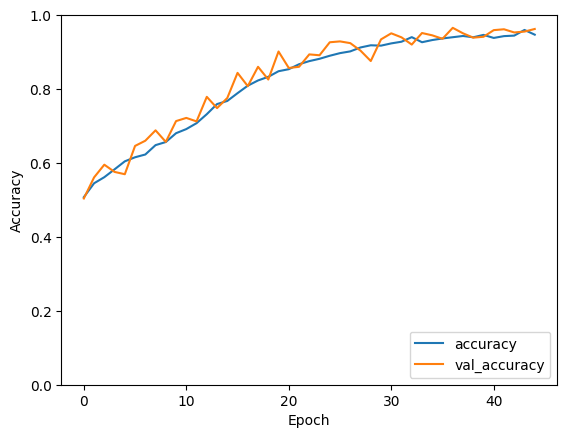

In [12]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [13]:
model.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    validation_data=validation_generator,
    epochs=8  # Adjust the number of epochs as needed
)

Epoch 1/8
159/159 [==============================] - 237s 1s/step - loss: 0.1404 - accuracy: 0.9448 - val_loss: 0.1494 - val_accuracy: 0.9578
Epoch 2/8
159/159 [==============================] - 241s 2s/step - loss: 0.1308 - accuracy: 0.9512 - val_loss: 0.0978 - val_accuracy: 0.9648
Epoch 3/8
159/159 [==============================] - 239s 2s/step - loss: 0.1158 - accuracy: 0.9587 - val_loss: 0.1228 - val_accuracy: 0.9570
Epoch 4/8
159/159 [==============================] - 244s 2s/step - loss: 0.1157 - accuracy: 0.9607 - val_loss: 0.1521 - val_accuracy: 0.9563
Epoch 5/8
159/159 [==============================] - 238s 1s/step - loss: 0.1141 - accuracy: 0.9591 - val_loss: 0.0877 - val_accuracy: 0.9695
Epoch 6/8
159/159 [==============================] - 243s 2s/step - loss: 0.1069 - accuracy: 0.9589 - val_loss: 0.1255 - val_accuracy: 0.9648
Epoch 7/8
159/159 [==============================] - 241s 2s/step - loss: 0.1164 - accuracy: 0.9615 - val_loss: 0.1770 - val_accuracy: 0.9445
Epoch 

In [14]:
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')

41/41 [==============================] - 21s 493ms/step - loss: 0.0891 - accuracy: 0.9719
Validation Accuracy: 97.19%


In [15]:
model.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    validation_data=validation_generator,
    epochs=5  # Adjust the number of epochs as needed
)

Epoch 1/5
159/159 [==============================] - 246s 2s/step - loss: 0.1377 - accuracy: 0.9508 - val_loss: 0.1094 - val_accuracy: 0.9656
Epoch 2/5
159/159 [==============================] - 242s 2s/step - loss: 0.1053 - accuracy: 0.9601 - val_loss: 0.1126 - val_accuracy: 0.9648
Epoch 3/5
159/159 [==============================] - 242s 2s/step - loss: 0.0974 - accuracy: 0.9632 - val_loss: 0.1098 - val_accuracy: 0.9664
Epoch 4/5
159/159 [==============================] - 236s 1s/step - loss: 0.1148 - accuracy: 0.9589 - val_loss: 0.1437 - val_accuracy: 0.9563
Epoch 5/5
159/159 [==============================] - 241s 2s/step - loss: 0.1009 - accuracy: 0.9611 - val_loss: 0.1265 - val_accuracy: 0.9672


In [16]:
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')

41/41 [==============================] - 15s 354ms/step - loss: 0.1264 - accuracy: 0.9672
Validation Accuracy: 96.72%


In [17]:
model.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    validation_data=validation_generator,
    epochs=5  # Adjust the number of epochs as needed
)

Epoch 1/5
159/159 [==============================] - 245s 2s/step - loss: 0.1035 - accuracy: 0.9638 - val_loss: 0.1031 - val_accuracy: 0.9688
Epoch 2/5
159/159 [==============================] - 233s 1s/step - loss: 0.1123 - accuracy: 0.9587 - val_loss: 0.1403 - val_accuracy: 0.9563
Epoch 3/5
159/159 [==============================] - 236s 1s/step - loss: 0.0970 - accuracy: 0.9632 - val_loss: 0.1435 - val_accuracy: 0.9672
Epoch 4/5
159/159 [==============================] - 240s 2s/step - loss: 0.0913 - accuracy: 0.9670 - val_loss: 0.1731 - val_accuracy: 0.9477
Epoch 5/5
159/159 [==============================] - 240s 2s/step - loss: 0.0986 - accuracy: 0.9691 - val_loss: 0.0980 - val_accuracy: 0.9734


In [18]:
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')

41/41 [==============================] - 16s 370ms/step - loss: 0.0980 - accuracy: 0.9735
Validation Accuracy: 97.35%


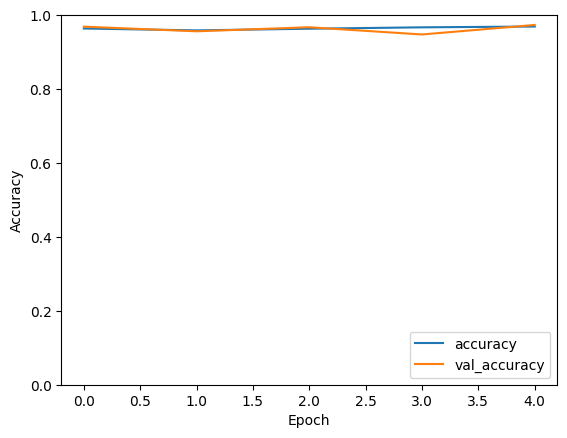

In [19]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [20]:
!pip install scikit-learn
import sklearn.metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Evaluate the model
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')

# Predict the labels for validation data
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Get the true labels
y_true = validation_generator.classes

# Print classification report
print('Classification Report')
target_names = ['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented']
print(classification_report(y_true, y_pred, target_names=target_names)) # Call the function after importing

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)
print('Confusion Matrix')
print(cm)

41/41 [==============================] - 16s 381ms/step - loss: 0.0980 - accuracy: 0.9735
Validation Accuracy: 97.35%
41/41 [==============================] - 16s 381ms/step
Classification Report
                    precision    recall  f1-score   support

     Mild_Demented       0.17      0.18      0.18       180
 Moderate_Demented       0.00      0.00      0.00        13
      Non_Demented       0.48      0.47      0.47       640
Very_Mild_Demented       0.30      0.31      0.30       448

          accuracy                           0.37      1281
         macro avg       0.24      0.24      0.24      1281
      weighted avg       0.37      0.37      0.37      1281

Confusion Matrix
[[ 32   2  83  63]
 [  3   0   7   3]
 [ 83   5 302 250]
 [ 65   6 240 137]]


In [21]:
# Assuming you have a base directory and validation directory
base_dir = '/content/drive/MyDrive/MRI/Dataset'
validation_dir = os.path.join(base_dir, 'validation')

# Print the files in the validation directory to verify it's correct
!ls "{validation_dir}"

# Data generator for validation data (no changes needed here)
validation_datagen = ImageDataGenerator(rescale=1./255)

# Flow data from validation directory (no changes needed here)
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(128, 128),  # Resize images
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Important: Do not shuffle for correct labels alignment
)

# Evaluate the model on validation data (no changes needed here)
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')

Mild_Demented  Moderate_Demented  Non_Demented	Very_Mild_Demented
Found 1281 images belonging to 4 classes.
41/41 [==============================] - 23s 559ms/step - loss: 0.0980 - accuracy: 0.9735
Validation Accuracy: 97.35%


1/1 [==============================] - 0s 145ms/step
Predicted class: Mild_Demented
Class probabilities: [[9.9964225e-01 1.3091674e-14 6.3831918e-09 3.5774944e-04]]


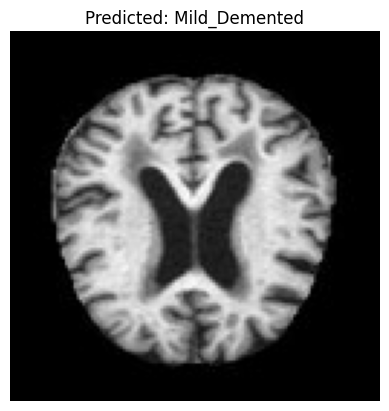

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Function to load and preprocess image
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(128, 128))  # Load the image and resize
    img_array = image.img_to_array(img)  # Convert to array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize to [0, 1]
    return img_array, img

# Function to predict the class of the MRI image
def predict_mri_image(img_path, model):
    img_array, img = load_and_preprocess_image(img_path)
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)[0]

    # Class labels
    class_labels = ['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented']

    print(f'Predicted class: {class_labels[predicted_class]}')
    print(f'Class probabilities: {prediction}')

    # Display the image
    plt.imshow(img)
    plt.title(f'Predicted: {class_labels[predicted_class]}')
    plt.axis('off')
    plt.show()

# Example usage
new_image_path = '/content/mild_4.jpg'  # Replace with the path to your image
predict_mri_image(new_image_path, model)

In [23]:
# Save the entire model as a SavedModel.
model.save('my_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [24]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from google.colab import files
from PIL import Image
import matplotlib.pyplot as plt

In [25]:
model1 = tf.keras.models.load_model('my_model.h5')

In [26]:
uploaded = files.upload()

Saving non_3.jpg to non_3.jpg


In [27]:
def load_and_preprocess_image(img_path):
    img = tf.keras.utils.load_img(img_path, target_size=(128, 128))
    img_array = tf.keras.utils.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Rescale to match training data
    return img_array

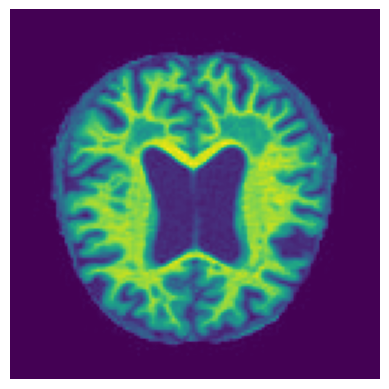

1/1 [==============================] - 0s 55ms/step
Predicted class: Non_Demented
Class probabilities: [[4.1502247e-08 1.2009165e-22 9.9536288e-01 4.6370542e-03]]


In [28]:
for fn in uploaded.keys():
    # Display the image
    img = Image.open(fn)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    # Preprocess the image and make prediction
    img_array = load_and_preprocess_image(fn)
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)[0]

    # Class labels
    class_labels = ['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented']

    # Print the prediction
    print(f'Predicted class: {class_labels[predicted_class]}')
    print(f'Class probabilities: {prediction}')